In [11]:
import os
import random
import torch
import torch.nn.functional as F
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt

In [12]:
# ======================
# CONFIG
# ======================
DATA_DIR = "../cnn_dataset/test"
MODEL_PATH = "../efficientnetv2s_best_finetuned_best.pth"
IMG_SIZE = 224
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [13]:
# ======================
# TRANSFORM (same as val)
# ======================
tfms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])

# ======================
# LOAD MODEL
# ======================
classes = sorted(os.listdir(DATA_DIR))
NUM_CLASSES = len(classes)

model = models.efficientnet_v2_s(weights=None)
in_features = model.classifier[1].in_features
model.classifier[1] = torch.nn.Linear(in_features, NUM_CLASSES)

model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE))
model = model.to(DEVICE)
model.eval()

print("Classes:", classes)

C:\Users\Lap Heaven\AppData\Local\Temp\ipykernel_20988\1793196308.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(MODEL_PATH, map_locat

Classes: ['1509', 'IRRI-6', 'Super White']


In [14]:
# ======================
# PICK 1 RANDOM IMAGE PER CLASS
# ======================
samples = []

for cls in classes:
    class_folder = os.path.join(DATA_DIR, cls)
    imgs = os.listdir(class_folder)
    img_name = random.choice(imgs)
    samples.append((cls, os.path.join(class_folder, img_name)))

print(samples)

[('1509', '../cnn_dataset/test\\1509\\1509_3549.jpg'), ('IRRI-6', '../cnn_dataset/test\\IRRI-6\\IRRI-6_4427.jpg'), ('Super White', '../cnn_dataset/test\\Super White\\SUPER WHITE_7122.jpg')]



Image: 1509_3549.jpg
True : 1509
Pred : 1509
Conf : 0.9682

Image: IRRI-6_4427.jpg
True : IRRI-6
Pred : IRRI-6
Conf : 0.9663

Image: SUPER WHITE_7122.jpg
True : Super White
Pred : Super White
Conf : 0.9710


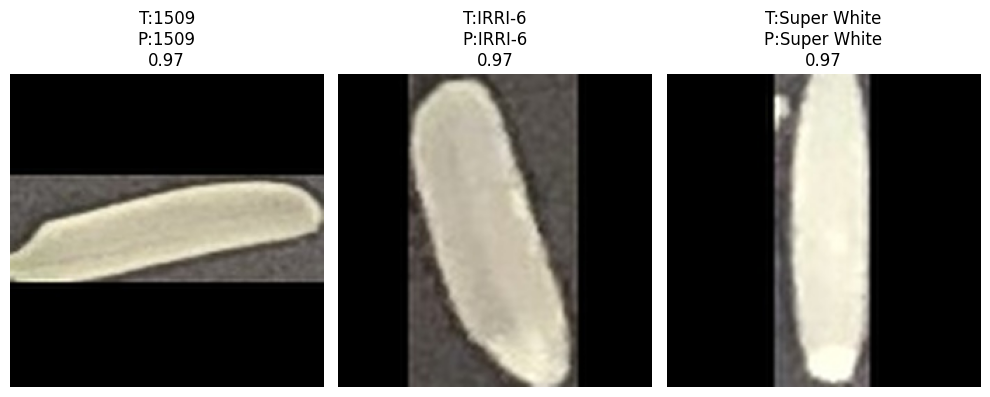

In [15]:
# ======================
# PREDICT + SHOW
# ======================
plt.figure(figsize=(10,4))

for i, (true_label, path) in enumerate(samples):

    img = Image.open(path).convert("RGB")
    input_tensor = tfms(img).unsqueeze(0).to(DEVICE)

    with torch.no_grad():
        output = model(input_tensor)
        probs = F.softmax(output, dim=1)

    conf, pred_idx = torch.max(probs, 1)

    pred_label = classes[pred_idx.item()]
    confidence = conf.item()

    print(f"\nImage: {os.path.basename(path)}")
    print(f"True : {true_label}")
    print(f"Pred : {pred_label}")
    print(f"Conf : {confidence:.4f}")

    # show image
    plt.subplot(1, len(samples), i+1)
    plt.imshow(img)
    plt.title(f"T:{true_label}\nP:{pred_label}\n{confidence:.2f}")
    plt.axis("off")

plt.tight_layout()
plt.show()
